In [124]:
# Libraries

import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# Data import and preview

In [125]:
dataset = pd.read_csv('C:/Users/olekw/Desktop/Studia/MAG 1 - WNE/12.ML/__Project/_data/newborn_train.csv')
pd.options.display.float_format = '{:20.2f}'.format

In [126]:
#dataset.head(n=5)

In [127]:
dataset.describe(include=[np.number], percentiles=[.2]) \
    .transpose().drop('count', axis=1)

,mean,std,min,20%,50%,max
mother_body_mass_index,27.17,6.76,13.00,21.60,25.70,69.80
mother_marital_status,1.40,0.49,1.00,1.00,1.00,2.00
mother_delivery_weight,188.32,41.37,100.00,154.00,181.00,400.00
mother_race,1.52,1.11,1.00,1.00,1.00,6.00
mother_height,64.12,2.84,30.00,62.00,64.00,78.00
mother_weight_gain,29.48,15.15,0.00,17.00,29.00,98.00
father_age,31.80,6.81,11.00,26.00,31.00,98.00
father_education,4.90,2.31,1.00,3.00,4.00,9.00
cigarettes_before_pregnancy,1.10,4.73,0.00,0.00,0.00,98.00
prenatal_care_month,5.30,15.06,0.00,2.00,3.00,99.00


In [128]:
dataset.describe(include=[object]).transpose() \
    .drop('count', axis=1)

,unique,top,freq
previous_cesarean,3,N,2020874
newborn_gender,2,M,1225891


# Data cleaning

## Missing values removal

In [129]:
num_missing = dataset.isna().sum()
# Excluding columns that contains 0 missing values
num_missing = num_missing[num_missing > 0]
# Getting the percentages of missing values
percent_missing = num_missing * 100 / dataset.shape[0]
# Concatenating the number and perecentage of missing values 
# into one dataframe and sorting it
pd.concat([num_missing, percent_missing], axis=1, 
          keys=['Missing Values', 'Percentage']).\
          sort_values(by='Missing Values', ascending=False)

,Missing Values,Percentage
father_age,444506,18.54
mother_marital_status,412510,17.20
mother_height,244529,10.20
mother_body_mass_index,146600,6.11
mother_weight_gain,73473,3.06
number_prenatal_visits,59901,2.50
mother_delivery_weight,34958,1.46
cigarettes_before_pregnancy,11301,0.47


## Missing's - Variables

### Father age

In this case, we will replace the missing values with the average fathers age.

In [130]:
dataset['father_age'].value_counts()

father_age
32.00    120181
31.00    118844
33.00    116729
30.00    116504
29.00    109740
          ...  
91.00         1
11.00         1
85.00         1
98.00         1
82.00         1
Name: count, Length: 78, dtype: int64

In [131]:
dataset['father_age'].fillna(0, inplace=True)

### Mother marital status

1 - Married ||
2 - Not married --> 0 - Other

In this case, missing values will be replaced with 0, as we will assume that the missing values could be describing other marital statuses, not directly described as 'married'.

In [132]:
dataset['mother_marital_status'].value_counts()

mother_marital_status
1.00    1192238
2.00     793368
Name: count, dtype: int64

In [133]:
dataset['mother_marital_status'].fillna(0, inplace=True)

### Mother height

In this case, we will replace the missing values with the average of the height.

In [134]:
dataset['mother_height'].value_counts()

mother_height
64.00    319699
63.00    281534
62.00    273071
65.00    257357
66.00    237395
67.00    187786
61.00    155167
60.00    119183
68.00    103323
69.00     69668
59.00     49961
70.00     34409
71.00     18487
58.00     12701
57.00     11234
72.00      8406
56.00      4039
73.00      2774
55.00      1756
74.00      1401
54.00       797
53.00       752
75.00       513
78.00       438
48.00       283
76.00       269
77.00       266
49.00       256
52.00       242
51.00       201
50.00       153
30.00        10
47.00         9
45.00         8
36.00         7
39.00         7
46.00         6
37.00         3
41.00         3
38.00         3
40.00         2
31.00         2
42.00         2
43.00         2
32.00         1
33.00         1
Name: count, dtype: int64

In [135]:
dataset['mother_height'].fillna(dataset['mother_height'].mean, inplace=True)

### Mother body mass index

In this case, we will replace the missing values with the average of the BMI.

In [136]:
dataset['mother_body_mass_index'].value_counts()

mother_body_mass_index
26.60    41362
28.30    36430
23.00    29869
22.30    28077
25.80    27046
         ...  
67.20        1
69.40        1
66.30        1
68.90        1
68.60        1
Name: count, Length: 561, dtype: int64

In [137]:
dataset['mother_body_mass_index'].fillna(dataset['mother_body_mass_index'].mean, inplace=True)

### Mother weight gain

In this case, we will replace the missing values with the mothers average weight gain.

In [138]:
dataset['mother_weight_gain'].value_counts()

mother_weight_gain
30.00    110254
20.00     84648
25.00     80517
35.00     73636
 0.00     68723
          ...  
91.00       251
94.00       232
93.00       228
96.00       215
97.00       181
Name: count, Length: 99, dtype: int64

In [139]:
dataset['mother_weight_gain'].fillna(dataset['mother_weight_gain'].mean, inplace=True)

### Number prenatal visits

In this case, as the number of prenatal visits is the highets around 10-14, with outliers around 60-70, we will replace the missing values with the mode of the visits.

In [140]:
dataset['number_prenatal_visits'].value_counts()

number_prenatal_visits
12.00    370513
10.00    313608
11.00    238126
13.00    229898
14.00    193076
          ...  
62.00         1
71.00         1
68.00         1
66.00         1
63.00         1
Name: count, Length: 81, dtype: int64

In [141]:
dataset['number_prenatal_visits'].fillna(dataset['number_prenatal_visits'].mode, inplace=True)

### Mother delivery weight

In this case, we will replace the missing values with the mothers average weight.

In [142]:
dataset['mother_delivery_weight'].value_counts()

mother_delivery_weight
160.00    47979
180.00    47202
170.00    44111
150.00    40506
165.00    37313
          ...  
399.00       47
393.00       47
387.00       45
397.00       41
394.00       38
Name: count, Length: 301, dtype: int64

In [143]:
dataset['mother_delivery_weight'].fillna(dataset['mother_delivery_weight'].mean, inplace=True)

### Cigarettes before pregnancy

In this case, since the percentage of missing values is low (0.47%), we will optimistically replace the missing values with 0.

In [144]:
dataset['cigarettes_before_pregnancy'].value_counts()

cigarettes_before_pregnancy
 0.00    2186624
20.00      60078
10.00      53333
 5.00      21147
 3.00       9887
          ...   
92.00          1
69.00          1
29.00          1
73.00          1
72.00          1
Name: count, Length: 67, dtype: int64

In [145]:
dataset['cigarettes_before_pregnancy'].fillna(0, inplace=True)

### Verification

In [146]:
dataset.isna().values.sum()

0

## One-hot encoding

In this step, we will use one-hot encoding to transform certain nominal variables.

#Create dummies/one-hot encoding on every nominal attributes in train dataframe
mother_marital_status_dummies = pd.get_dummies(dataset['mother_marital_status'],prefix='mother_marital_status')
mother_race_dummies = pd.get_dummies(dataset['mother_race'],prefix='mother_race')
father_education_dummies = pd.get_dummies(dataset['father_education'],prefix='father_education')
previous_cesarean_dummies = pd.get_dummies(dataset['previous_cesarean'],prefix='previous_cesarean')
newborn_gender_dummies = pd.get_dummies(dataset['newborn_gender'],prefix='newborn_gender')

#Concate the dummies into train dataset
dataset = pd.concat([dataset, mother_marital_status_dummies, mother_race_dummies, father_education_dummies, previous_cesarean_dummies, newborn_gender_dummies], axis=1)

#Drop categorical attribute (before transformation)
dataset = dataset.drop(['mother_marital_status','mother_race', 'father_education', 'previous_cesarean', 'newborn_gender'], axis=1)

## Prenatal care month - issue

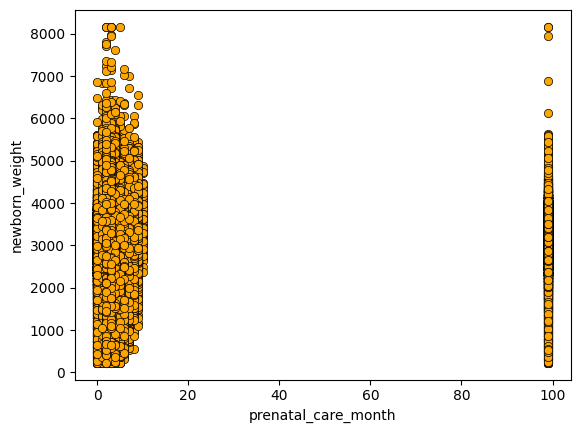

In [147]:
plt.scatter(x=dataset['prenatal_care_month'], y=dataset['newborn_weight'], 
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel('prenatal_care_month'); plt.ylabel('newborn_weight');

# Exploratory Data Analysis

In [148]:
dataset.describe()

,mother_marital_status,mother_race,father_age,father_education,cigarettes_before_pregnancy,prenatal_care_month,newborn_weight
count,2398116.00,2398116.00,2398116.00,2398116.00,2398116.00,2398116.00,2398116.00
mean,1.16,1.52,25.91,4.90,1.10,5.30,3261.84
std,0.69,1.11,13.80,2.31,4.72,15.06,590.47
min,0.00,1.00,0.00,1.00,0.00,0.00,227.00
25%,1.00,1.00,23.00,3.00,0.00,2.00,2960.00
50%,1.00,1.00,30.00,4.00,0.00,3.00,3300.00
75%,2.00,2.00,35.00,6.00,0.00,3.00,3629.00
max,2.00,6.00,98.00,9.00,98.00,99.00,8165.00


In [158]:
# TUTAJ JEST PROBLEM, PLZ FIX

avg_prenatal = dataset['number_prenatal_visits'].mean

print(avg_prenatal)

RecursionError: maximum recursion depth exceeded

<Axes: xlabel='mother_marital_status'>

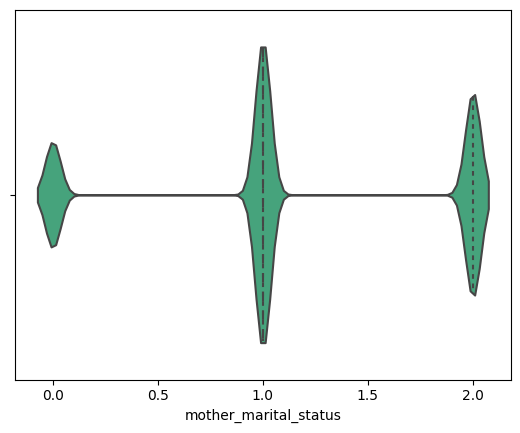

In [ ]:
sns.violinplot(x=dataset['mother_marital_status'], inner="quartile", color="#36B37E")

<Axes: xlabel='father_age'>

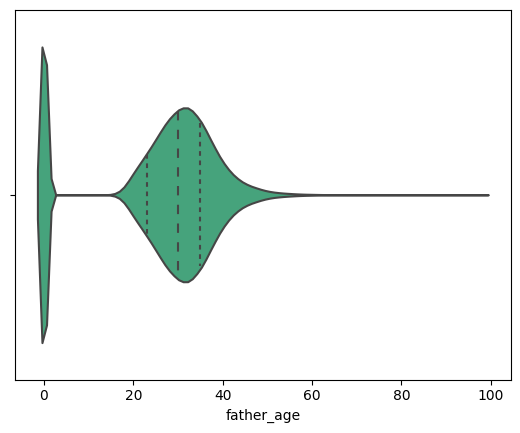

In [ ]:
sns.violinplot(x=dataset['father_age'], inner="quartile", color="#36B37E")